In [104]:
!pip install vaderSentiment

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
path = "/content/drive/MyDrive/Colab Notebooks/Bases/DatingAppReviewsDataset.csv"

In [108]:
dados = pd.read_csv(path, sep=',', index_col=0)

In [109]:
dados.shape

(681994, 6)

In [110]:
dados.isnull().sum()

Name            5
Review       1352
Rating          0
#ThumbsUp       0
Date&Time       0
App             0
dtype: int64

In [111]:
dados.dropna(inplace=True)

In [112]:
dados.isnull().sum()

Name         0
Review       0
Rating       0
#ThumbsUp    0
Date&Time    0
App          0
dtype: int64

In [113]:
dados.head()

,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder


In [114]:
dados = dados.drop(["#ThumbsUp"], axis=1)
dados = dados.drop(["Name"], axis=1)
dados = dados.drop(["Date&Time"], axis=1)

In [115]:
dados.head()

,Review,Rating,App
0,On this app i cant find a partner,5,Tinder
1,Tinder would be so much better if we could spe...,3,Tinder
2,Still doesn't correctly notify matches or mess...,1,Tinder
3,"Got banned because I updated my bio to say ""I ...",2,Tinder
4,Love it!,5,Tinder


In [116]:
dados.shape

(680637, 3)

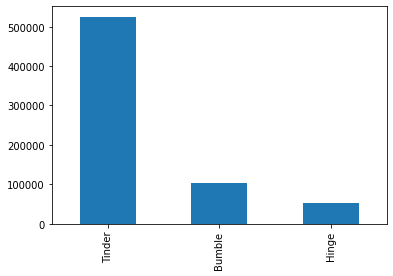

In [117]:
dados["App"].value_counts().plot(kind="bar")

In [118]:
freq = dados['App'].value_counts() 
print(freq)

Tinder    525265
Bumble    102380
Hinge      52992
Name: App, dtype: int64


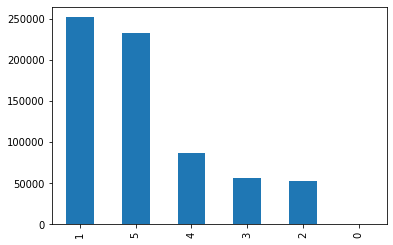

In [119]:
dados["Rating"].value_counts().plot(kind="bar")

In [121]:
freq = dados['Rating'].value_counts() 
print(freq)

1    251846
5    232750
4     86962
3     56853
2     52225
0         1
Name: Rating, dtype: int64


In [122]:
review = dados["Review"].values

In [123]:
dados['New_Rating'] = dados['Rating'].replace([0, 1, 2, 3, 4, 5], ["negative" , "negative", "negative", "positive", "positive", "positive"])

In [124]:
analyser = SentimentIntensityAnalyzer()

In [125]:
def analise(texto):
 df_analisado = analyser.polarity_scores(texto)['compound'] 
 return df_analisado

In [126]:
dados['New_Review'] = dados['Review'].apply(analise)

In [127]:
dados['New_Review']

0        0.0000
1        0.4902
2       -0.7380
3       -0.5994
4        0.6696
          ...  
52989   -0.7096
52990    0.0000
52991    0.0000
52992    0.0000
52993    0.0000
Name: New_Review, Length: 680637, dtype: float64

In [128]:
def analise2(score):
  if score > 0:
    return 'positive'
 
  return 'negative'

In [129]:
dados['Sentiment'] = dados['New_Review'].apply(analise2)

In [130]:
acuracia = accuracy_score(dados['New_Rating'], dados['Sentiment'])
print('A acurácia do modelo foi', acuracia)

A acurácia do modelo foi 0.7424897559198221


In [131]:
freq = dados.groupby(['New_Rating', 'App']).size() 
print(freq)

New_Rating  App   
negative    Bumble     50085
            Hinge      20428
            Tinder    233559
positive    Bumble     52295
            Hinge      32564
            Tinder    291706
dtype: int64


In [132]:
tinderp = len(dados[(dados['App'] == 'Tinder') & (dados['Sentiment'] == 'positive')])
tindern = len(dados[(dados['App'] == 'Tinder') & (dados['Sentiment'] == 'negative')])
bumblep = len(dados[(dados['App'] == 'Bumble') & (dados['Sentiment'] == 'positive')])
bumblen = len(dados[(dados['App'] == 'Bumble') & (dados['Sentiment'] == 'negative')])
hingep = len(dados[(dados['App'] == 'Hinge') & (dados['Sentiment'] == 'positive')])
hingen = len(dados[(dados['App'] == 'Hinge') & (dados['Sentiment'] == 'negative')])

In [133]:
def graph(valor1, valor2):
  labels = 'positive', 'negative'
  sizes = [valor1, valor2]
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')
  return plt.show()

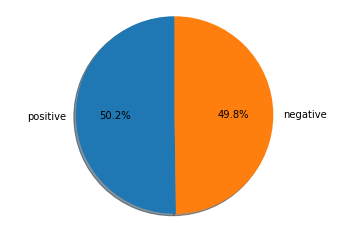

In [134]:
graph(tinderp, tindern)

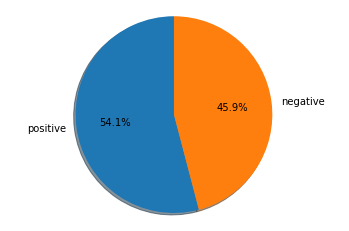

In [135]:
graph(bumblep, bumblen)

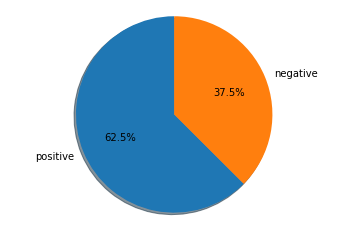

In [136]:
graph(hingep, hingen)